# Unsupervised Learning

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Clustering

### K-Means

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [3]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [4]:
X, y = make_blobs(n_samples = 2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [5]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [6]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [7]:
y_pred is kmeans.labels_

True

In [8]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [9]:
X_new = np.array([[0,2], [-3,3],[-3, 2.5]])
kmeans.predict(X_new)

array([1, 2, 2])

In [10]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### Centroid Initialization methods

In [11]:
good_init = np.array([[-3,3],[-3, 2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [12]:
kmeans.fit(X)
kmeans.inertia_

211.5985372581683

In [13]:
kmeans.score(X)

-211.5985372581683

###  Accelerated K-Means and Mini-Batch K-Means

In [14]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

### Finding the optimal number of clusters

In [15]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

### Using Clustering for Image Segmentation

In [16]:
import urllib.request
images_path = os.path.join(PROJECT_ROOT_DIR, "images","unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/"+filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x25904e3e5b0>)

In [17]:
from matplotlib.image import imread

image = imread(os.path.join("images","unsupervised_learning", "ladybug.png"))


In [18]:
image.shape

(533, 800, 3)

In [19]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

### Using Clustering for Preprocessing

In [20]:
from sklearn.datasets import load_digits

X_digits, y_digits =load_digits(return_X_y = True)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [23]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

In [24]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr",solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [25]:
pipeline.score(X_test, y_test)

0.9777777777777777

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose= 2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.4s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=37; total time=   2.8s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=39; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=39; total time=   3.9s
[CV] END ...................

KeyboardInterrupt: 

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.score(X_test, y_test)

### Using Clustering for Semi-Supervised Learning

In [42]:
n_labeled=50
log_reg = LogisticRegression(multi_class="ovr",solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(multi_class='ovr', random_state=42)

In [43]:
log_reg.score(X_test, y_test)

0.8333333333333334

In [44]:
k=50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Saving figure representative_images_diagram


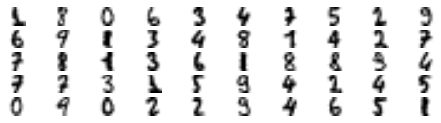

In [45]:
plt.figure(figsize=(8,2))
for index, X_representative_digit in enumerate (X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8,8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [46]:
y_train[representative_digit_idx]

array([1, 8, 0, 6, 3, 4, 7, 5, 2, 9, 6, 9, 1, 3, 4, 8, 1, 4, 2, 7, 7, 8,
       1, 3, 6, 1, 8, 8, 9, 4, 7, 7, 3, 1, 5, 9, 4, 2, 4, 5, 0, 9, 0, 2,
       2, 9, 4, 6, 5, 1])

In [76]:
y_representative_digits = np.array([
    1, 8, 0, 6, 3, 4, 7, 5, 2, 9,
    6, 9, 1, 3, 4, 8, 1, 4, 2, 7,
    7, 8, 1, 3, 6, 1, 8, 8, 3, 4,
    7, 7, 3, 1, 5, 9, 4, 2, 4, 5,
    0, 9, 0, 2, 2, 9, 4, 6, 5, 1
])

In [77]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [78]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8977777777777778

In [103]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [104]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [105]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [106]:
log_reg.score(X_test, y_test)

0.9133333333333333

In [107]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9461615154536391